In [2]:
from selenium import webdriver
from selenium.common.exceptions import NoSuchElementException
from selenium.common import exceptions
from selenium.webdriver.common.keys import Keys
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.action_chains import ActionChains 
from bs4 import BeautifulSoup
import pandas as pd
import requests # for making standard html requests
import json
import re
from random import randint
from time import sleep

In [ ]:
#!pip install webdriver-manager


In [ ]:
# driver = webdriver.Chrome(ChromeDriverManager().install())

In [3]:
driver_chrome = webdriver.Chrome(executable_path="C:/Users/ksalg/Curso Python Datahack/chromedriver.exe")

In [4]:
pisos_url = 'https://www.fotocasa.es/es/alquiler/viviendas/madrid-capital/todas-las-zonas/amueblado/l/?combinedLocationIds=724%2C14%2C28%2C173%2C0%2C28079%2C0%2C0%2C0&gridType=3&latitude=40.4096&longitude=-3.68624'
r = driver_chrome.get(pisos_url)
content = driver_chrome.page_source
soup = BeautifulSoup(content, 'html.parser')
flat_containers = soup.findAll('div', attrs={'class':'re-Searchresult-itemRow'})
print(type(flat_containers))
print(len(flat_containers))

<class 'bs4.element.ResultSet'>
40


In [7]:
prices=[] #List to store price of the apartment
features =[] #list to store features
addresses=[] #List to store address
descriptions = []

In [17]:
for page in range(148,190):
    pisos_url = 'https://www.fotocasa.es/es/alquiler/viviendas/madrid-capital/todas-las-zonas/amueblado/l/'+str(page)+'combinedLocationIds=724%2C14%2C28%2C173%2C0%2C28079%2C0%2C0%2C0&gridType=3&latitude=40.4096&longitude=-3.68624'
    r = driver_chrome.get(pisos_url)
    content = driver_chrome.page_source
    soup = BeautifulSoup(content, 'html.parser')
    flat_containers = soup.findAll('div', attrs={'class':'re-Searchresult-itemRow'})
    if flat_containers != []:
        for a in flat_containers:
            price=a.find('span', attrs={'class': 're-Card-price'})
            feature=a.find('div', attrs={'class': 're-CardFeatures-wrapper'})
            address=a.find('h3', attrs={'class': 're-Card-title'})
            description=a.find('span', attrs={'class': 're-Card-description'})

            if None in (price, feature, address, description):
                continue
            prices.append(price.text)
            features.append(feature.text)
            addresses.append(address.text)
            descriptions.append(description.text)
            sleep(randint(1,3))
    else:
        break

In [18]:
len(prices)

576

In [19]:
df_apt = pd.DataFrame({'Precio':prices,'Características':features, 'Dirección':addresses, 'Descripción':descriptions}) 

In [20]:
df_apt.head(10)

,Precio,Características,Dirección,Descripción
0,3.200 € /mes,3 habs.2 baños107 m²con ascensor y terraza,ÁticoChamartín,"Este precioso piso de 110m² amueblado, muy lu..."
1,1.150 € /mes,3 habs.1 baño84 m²,"PisoCalle de Santa Fe, Moncloa",Vivienda XXI alquila piso exterior de 3 dormit...
2,2.100 € /mes,2 habs.1 baño107 m²con ascensor y terraza,"PisoPlaza de España, Moncloa",.En uno de los edificios más emblemáticos de M...
3,1.300 € /mes,3 habs.2 baños100 m²con ascensor y terraza,"PisoCalle del Doctor Esquerdo, Retiro",Agencia inmobiliaria de MADRID - zona AVDA. CI...
4,1.000 € /mes,3 habs.1 baño83 m²,"PisoCalle de Santa Pola, 5, Moncloa",Vivienda XXI alquila piso exterior de 3 dormit...
5,1.300 € /mes,3 habs.2 baños100 m²con ascensor y terraza,"PisoCalle del Doctor Esquerdo, Retiro",Agencia inmobiliaria de MADRID - zona AVDA. CI...
6,780 € /mes,1 baño30 m²con ascensor,"EstudioCalle de Guzmán el Bueno, Chamberí",REDFRIN alquila estudio en calle GUZMAN EL BUE...
7,1.300 € /mes,2 habs.1 baño55 m²con ascensor,PisoMoncloa,"En el prestigioso barrio de Argüelles , encont..."
8,1.300 € /mes,3 habs.2 baños100 m²con ascensor,"PisoCalle de Luis Mitjans, Retiro","""""Agencia inmobiliaria de Madrid - zona Avda. ..."
9,800 € /mes,1 hab.1 baño40 m²con ascensor,"EstudioBola, Centro",CONSORCIO REAL ESTATE OPERA ALQUILA. Estudio 4...


In [21]:
df_apt.to_csv('precios_pisos_madrid.csv', index=False, encoding='utf-8')

# Segunda parte

Ahora que hemos obtenido los datos de los pisos, vamos a abrir el csv que acabamos de crear:

In [53]:
import csv
import pandas as pd
path="C:/Users/ksalg/Curso Python Datahack/"
df_pisos=pd.read_csv(path+'precios_pisos_madrid.csv')

In [54]:
df_pisos.head()

,Precio,Características,Dirección,Descripción
0,3.200 € /mes,3 habs.2 baños107 m²con ascensor y terraza,ÁticoChamartín,"Este precioso piso de 110m² amueblado, muy lu..."
1,1.150 € /mes,3 habs.1 baño84 m²,"PisoCalle de Santa Fe, Moncloa",Vivienda XXI alquila piso exterior de 3 dormit...
2,2.100 € /mes,2 habs.1 baño107 m²con ascensor y terraza,"PisoPlaza de España, Moncloa",.En uno de los edificios más emblemáticos de M...
3,1.300 € /mes,3 habs.2 baños100 m²con ascensor y terraza,"PisoCalle del Doctor Esquerdo, Retiro",Agencia inmobiliaria de MADRID - zona AVDA. CI...
4,1.000 € /mes,3 habs.1 baño83 m²,"PisoCalle de Santa Pola, 5, Moncloa",Vivienda XXI alquila piso exterior de 3 dormit...


Vemos que necesitamos un poco de limpieza de datos, en el precio quitar el símbolo de € y /mes y convertirlo en integer, en características, separar número de habitaciones, baños, área y alguna característica extra, en Dirección tenemos el tipo de vivienda pega a la dirección y también eliminar duplicados.

In [55]:
df_pisos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Precio           576 non-null    object
 1   Características  576 non-null    object
 2   Dirección        576 non-null    object
 3   Descripción      576 non-null    object
dtypes: object(4)
memory usage: 18.1+ KB


## Para los precios:

Se puede resolver con strip y replace; además aprovechamos y ya lo convertimos en un integer, para poder utilizarlo como filtro más adelante en nuestro análisis

In [56]:
Precio = []
for price in df_pisos["Precio"]:
    precio = price.strip(" € /mes")
    if precio.find('.'):
        precio = precio.replace(".", "")
        Precio.append(int(precio))
        
df_pisos["Price"] = Precio

Echamos un ojo, y, ¡perfecto!

In [57]:
df_pisos.head()

,Precio,Características,Dirección,Descripción,Price
0,3.200 € /mes,3 habs.2 baños107 m²con ascensor y terraza,ÁticoChamartín,"Este precioso piso de 110m² amueblado, muy lu...",3200
1,1.150 € /mes,3 habs.1 baño84 m²,"PisoCalle de Santa Fe, Moncloa",Vivienda XXI alquila piso exterior de 3 dormit...,1150
2,2.100 € /mes,2 habs.1 baño107 m²con ascensor y terraza,"PisoPlaza de España, Moncloa",.En uno de los edificios más emblemáticos de M...,2100
3,1.300 € /mes,3 habs.2 baños100 m²con ascensor y terraza,"PisoCalle del Doctor Esquerdo, Retiro",Agencia inmobiliaria de MADRID - zona AVDA. CI...,1300
4,1.000 € /mes,3 habs.1 baño83 m²,"PisoCalle de Santa Pola, 5, Moncloa",Vivienda XXI alquila piso exterior de 3 dormit...,1000


## Para las habitaciones

Para esto se me ocurrió convertir en una lista separada por "hab" a cada elemento de "Características", siendo el primer elemento de la lista el número de habitaciones. Revisando el dataframe, si la palabra "hab" no existe, es porque el piso no tiene habitaciones y es un estudio, por lo que si no encuentra la palabra hab, el resultado será directamente 0. Además convertirmos estos valores en integers para poder hacer nuestro análisis más adelante

In [58]:
Rooms = []
for c in df_pisos["Características"]:
    if c.find("hab"):
        feat = c.replace("hab", ",")
    if 'hab' not in c:
        feat = '0'
    
    Rooms.append(int(feat[0]))

In [59]:
df_pisos['Rooms'] = Rooms

Comprobamos y ya tenemos el número de habitaciones en nuestro dataframe

In [60]:
df_pisos.head()

,Precio,Características,Dirección,Descripción,Price,Rooms
0,3.200 € /mes,3 habs.2 baños107 m²con ascensor y terraza,ÁticoChamartín,"Este precioso piso de 110m² amueblado, muy lu...",3200,3
1,1.150 € /mes,3 habs.1 baño84 m²,"PisoCalle de Santa Fe, Moncloa",Vivienda XXI alquila piso exterior de 3 dormit...,1150,3
2,2.100 € /mes,2 habs.1 baño107 m²con ascensor y terraza,"PisoPlaza de España, Moncloa",.En uno de los edificios más emblemáticos de M...,2100,2
3,1.300 € /mes,3 habs.2 baños100 m²con ascensor y terraza,"PisoCalle del Doctor Esquerdo, Retiro",Agencia inmobiliaria de MADRID - zona AVDA. CI...,1300,3
4,1.000 € /mes,3 habs.1 baño83 m²,"PisoCalle de Santa Pola, 5, Moncloa",Vivienda XXI alquila piso exterior de 3 dormit...,1000,3


## Para los baños

In [61]:
Baths = []
for c in df_pisos["Características"]:
    if c.find("baño"):
        feat = c.replace(".", ",").split(',')
        if len(feat)>=2:
            feat2=feat[1][0]
        else:
            feat2=1
    if 'baño' not in c:
        feat2=1

    Baths.append(int(feat2))

In [62]:
df_pisos['Baths'] = Baths

## Area del piso

In [63]:
area = []
for c in df_pisos["Características"]:
    indice = c.find("m²")
    try:
        bla = int(c[indice-4]+c[indice-3]+c[indice-2])
    except ValueError:
        bla= int(c[indice-3]+c[indice-2])
    area.append(bla)

In [64]:
df_pisos['Area'] = area

In [65]:
df_pisos.head()

,Precio,Características,Dirección,Descripción,Price,Rooms,Baths,Area
0,3.200 € /mes,3 habs.2 baños107 m²con ascensor y terraza,ÁticoChamartín,"Este precioso piso de 110m² amueblado, muy lu...",3200,3,2,107
1,1.150 € /mes,3 habs.1 baño84 m²,"PisoCalle de Santa Fe, Moncloa",Vivienda XXI alquila piso exterior de 3 dormit...,1150,3,1,84
2,2.100 € /mes,2 habs.1 baño107 m²con ascensor y terraza,"PisoPlaza de España, Moncloa",.En uno de los edificios más emblemáticos de M...,2100,2,1,107
3,1.300 € /mes,3 habs.2 baños100 m²con ascensor y terraza,"PisoCalle del Doctor Esquerdo, Retiro",Agencia inmobiliaria de MADRID - zona AVDA. CI...,1300,3,2,100
4,1.000 € /mes,3 habs.1 baño83 m²,"PisoCalle de Santa Pola, 5, Moncloa",Vivienda XXI alquila piso exterior de 3 dormit...,1000,3,1,83


## ¿Ascensor?

In [66]:
elevator = []
for c in df_pisos["Características"]:
    if 'ascensor' not in c:
        feat= 0
    else:
        feat = 1
    elevator.append(feat)

In [67]:
df_pisos['Elevator'] = elevator

## Parking

In [68]:
parking = []
for c in df_pisos["Características"]:
    if 'parking' not in c:
        feat= 0
    else:
        feat = 1
    parking.append(feat)

In [69]:
df_pisos['Parking'] = parking

In [70]:
terrace = []
for c in df_pisos["Características"]:
    if 'terraza' not in c:
        feat = 0
    else:
        feat = 1
    terrace.append(feat)

In [77]:
df_pisos['Terrace'] = terrace

## ¿Piso o Estudio?

In [71]:
tipo = []
for c in df_pisos["Dirección"]:
    if 'Estudio' not in c:
        feat= 1
    else:
        feat = 0
    tipo.append(feat)

In [72]:
df_pisos['Type'] = tipo 

In [73]:
barrio = []
barrios = ['Arganzuela', 'Barajas', 'Carabanchel', 'Centro', 'Chamartín','Chamberí', 'Ciudad Lineal', 'Fuencarral', 'Hortaleza',
           'Latina', 'Moncloa', 'Puente de Vallecas', 'Retiro', 'Salamanca', 'San Blas', 'Tetúan', 'Usera', 'Vicávaro']

In [74]:
for c in df_pisos["Dirección"]:
    for b in barrios:
        if b in c:
            feat=b
    barrio.append(feat)

In [75]:
df_pisos['NB'] = barrio

In [78]:
df_pisos.head()

,Precio,Características,Dirección,Descripción,Price,Rooms,Baths,Area,Elevator,Parking,Type,NB,Terrace
0,3.200 € /mes,3 habs.2 baños107 m²con ascensor y terraza,ÁticoChamartín,"Este precioso piso de 110m² amueblado, muy lu...",3200,3,2,107,1,0,1,Chamartín,1
1,1.150 € /mes,3 habs.1 baño84 m²,"PisoCalle de Santa Fe, Moncloa",Vivienda XXI alquila piso exterior de 3 dormit...,1150,3,1,84,0,0,1,Moncloa,0
2,2.100 € /mes,2 habs.1 baño107 m²con ascensor y terraza,"PisoPlaza de España, Moncloa",.En uno de los edificios más emblemáticos de M...,2100,2,1,107,1,0,1,Moncloa,1
3,1.300 € /mes,3 habs.2 baños100 m²con ascensor y terraza,"PisoCalle del Doctor Esquerdo, Retiro",Agencia inmobiliaria de MADRID - zona AVDA. CI...,1300,3,2,100,1,0,1,Retiro,1
4,1.000 € /mes,3 habs.1 baño83 m²,"PisoCalle de Santa Pola, 5, Moncloa",Vivienda XXI alquila piso exterior de 3 dormit...,1000,3,1,83,0,0,1,Moncloa,0


Ahora vamos a eliminar las columnas que no nos sirven

In [79]:
df_pisos = df_pisos.drop(['Dirección','Características', 'Precio'], axis=1)

In [80]:
df_pisos.head()

,Descripción,Price,Rooms,Baths,Area,Elevator,Parking,Type,NB,Terrace
0,"Este precioso piso de 110m² amueblado, muy lu...",3200,3,2,107,1,0,1,Chamartín,1
1,Vivienda XXI alquila piso exterior de 3 dormit...,1150,3,1,84,0,0,1,Moncloa,0
2,.En uno de los edificios más emblemáticos de M...,2100,2,1,107,1,0,1,Moncloa,1
3,Agencia inmobiliaria de MADRID - zona AVDA. CI...,1300,3,2,100,1,0,1,Retiro,1
4,Vivienda XXI alquila piso exterior de 3 dormit...,1000,3,1,83,0,0,1,Moncloa,0


# Tercera parte

Y ahora, ¡manos a la obra!, ¿qué es lo que queremos averiguar de estos datos? Tenemos: Precio, número de habitaciones, número de baños, si tiene o no ascensor, si tiene o no plaza de garaje si es estudio o piso completo (aunque eso lo podemos deducir también con el número de habitaciones) y el barrio al que pertenece el piso

In [81]:
df_pisos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Descripción  576 non-null    object
 1   Price        576 non-null    int64 
 2   Rooms        576 non-null    int64 
 3   Baths        576 non-null    int64 
 4   Area         576 non-null    int64 
 5   Elevator     576 non-null    int64 
 6   Parking      576 non-null    int64 
 7   Type         576 non-null    int64 
 8   NB           576 non-null    object
 9   Terrace      576 non-null    int64 
dtypes: int64(8), object(2)
memory usage: 45.1+ KB


## Revisando duplicados

Antes de profundizar mucho en nuestro dataset, debemos cerciorarnos de que no haya duplicados, para ellos utilizaré duplicated(), que marca como `True` todas aquellas filas (registros) que tienen el mismo valor en todos sus campos (marcandolas como `False` en caso contrario). Si quisiéramos solo centrarnos en algún campo en concreto le pasaríamos a `duplicated` una lista con los nombres de los campos a tomar en consideración:  `duplicated('campo1')` ó `duplicated(['campo1','campo2'...])`.

In [82]:
df_pisos[df_pisos.duplicated(keep='last')]

,Descripción,Price,Rooms,Baths,Area,Elevator,Parking,Type,NB,Terrace
0,"Este precioso piso de 110m² amueblado, muy lu...",3200,3,2,107,1,0,1,Chamartín,1
1,Vivienda XXI alquila piso exterior de 3 dormit...,1150,3,1,84,0,0,1,Moncloa,0
2,.En uno de los edificios más emblemáticos de M...,2100,2,1,107,1,0,1,Moncloa,1
3,Agencia inmobiliaria de MADRID - zona AVDA. CI...,1300,3,2,100,1,0,1,Retiro,1
4,Vivienda XXI alquila piso exterior de 3 dormit...,1000,3,1,83,0,0,1,Moncloa,0
...,...,...,...,...,...,...,...,...,...,...
558,"""""Agencia inmobiliaria de Madrid - zona Avda. ...",1300,3,2,100,1,0,1,Retiro,0
563,CONSORCIO REAL ESTATE ÓPERA ALQUILA última pla...,1150,2,1,62,1,0,1,Centro,0
567,Vivienda XXI alquila piso exterior de 3 dormit...,1150,3,1,84,0,0,1,Moncloa,0
568,"""""Agencia inmobiliaria de Madrid - zona Avda. ...",1300,3,2,100,1,0,1,Retiro,0


Lo siguiente sería eliminar los duplicados detectados, para ello utilizaríamos la sentencia `drop_duplicates()` indicando mediante el parámetro `keep` si queremos preservar la primera aparición (`'first'`, comportamiento por defecto), la última (`'last'`) ó eliminar todo duplicado (`False`). Además, el parámetro `inplace` permitirá que la eliminación de duplicados se haga in situ, sobre el propio dataframe sin necesidad de asignar el resultado de la función a un nuevo dataframe. Este parámetro es característico de todo método de `pandas` que conlleve posibles modificaciones del dataframe.

In [83]:
df_pisos.drop_duplicates(inplace=True)

Para que no quede ningún hueco en el indexado, vamos a reiniciar el índice con reset_index()

In [84]:
df_pisos.reset_index(drop=True, inplace=True)

Y como siempre hacemos una pequeña comprobación para confirmar de que no la hemos liado

In [85]:
df_pisos.head(15)

,Descripción,Price,Rooms,Baths,Area,Elevator,Parking,Type,NB,Terrace
0,"Este precioso piso de 110m² amueblado, muy lu...",3200,3,2,107,1,0,1,Chamartín,1
1,Vivienda XXI alquila piso exterior de 3 dormit...,1150,3,1,84,0,0,1,Moncloa,0
2,.En uno de los edificios más emblemáticos de M...,2100,2,1,107,1,0,1,Moncloa,1
3,Agencia inmobiliaria de MADRID - zona AVDA. CI...,1300,3,2,100,1,0,1,Retiro,1
4,Vivienda XXI alquila piso exterior de 3 dormit...,1000,3,1,83,0,0,1,Moncloa,0
5,REDFRIN alquila estudio en calle GUZMAN EL BUE...,780,0,1,30,1,0,0,Chamberí,0
6,"En el prestigioso barrio de Argüelles , encont...",1300,2,1,55,1,0,1,Moncloa,0
7,"""""Agencia inmobiliaria de Madrid - zona Avda. ...",1300,3,2,100,1,0,1,Retiro,0
8,CONSORCIO REAL ESTATE OPERA ALQUILA. Estudio 4...,800,1,1,40,1,0,0,Centro,0
9,"""Agencia inmobiliaria de Madrid - zona Avda. C...",800,2,1,72,1,0,1,Retiro,1


Y comprobamos con cuántos pisos nos hemos quedado al final

In [86]:
df_pisos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Descripción  61 non-null     object
 1   Price        61 non-null     int64 
 2   Rooms        61 non-null     int64 
 3   Baths        61 non-null     int64 
 4   Area         61 non-null     int64 
 5   Elevator     61 non-null     int64 
 6   Parking      61 non-null     int64 
 7   Type         61 non-null     int64 
 8   NB           61 non-null     object
 9   Terrace      61 non-null     int64 
dtypes: int64(8), object(2)
memory usage: 4.9+ KB


## Revisando nuestro dataset

Con la función describe podemos obteher un resumen estadístico de la distribución de nuestras features numéricas.

Por ejemplo, por sacar datos que puedan interesarnos:
    <li>La media de número de habitaciones es 2. Siendo el mínimo 0 habitaciones (estudios) y el máximo 4.</li>
    <li>La media de número de baños es 1, siendo el mínimo 1 y el máximo 2.</li>
    <li>En promedio el área ronda los 80 metros. El área mínima es 30 metros y la máxima 200</li>
    <li>El precio mínimo es 600€ y el máximo 3200€</li>

In [87]:
df_pisos.describe()

,Price,Rooms,Baths,Area,Elevator,Parking,Type,Terrace
count,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000
mean,1228.852459,2.098361,1.278689,79.655738,0.868852,0.016393,0.950820,0.213115
std,516.636069,1.011680,0.452075,31.139945,0.340363,0.128037,0.218039,0.412907
min,600.000000,0.000000,1.000000,30.000000,0.000000,0.000000,0.000000,0.000000
25%,890.000000,1.000000,1.000000,57.000000,1.000000,0.000000,1.000000,0.000000
50%,1100.000000,2.000000,1.000000,80.000000,1.000000,0.000000,1.000000,0.000000
75%,1300.000000,3.000000,2.000000,94.000000,1.000000,0.000000,1.000000,0.000000
max,3200.000000,4.000000,2.000000,200.000000,1.000000,1.000000,1.000000,1.000000


Con la librería matplotlib podemos tener una visión general más amigable

In [88]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [89]:
print("Matplotlib version " + matplotlib.__version__)

Matplotlib version 3.1.3


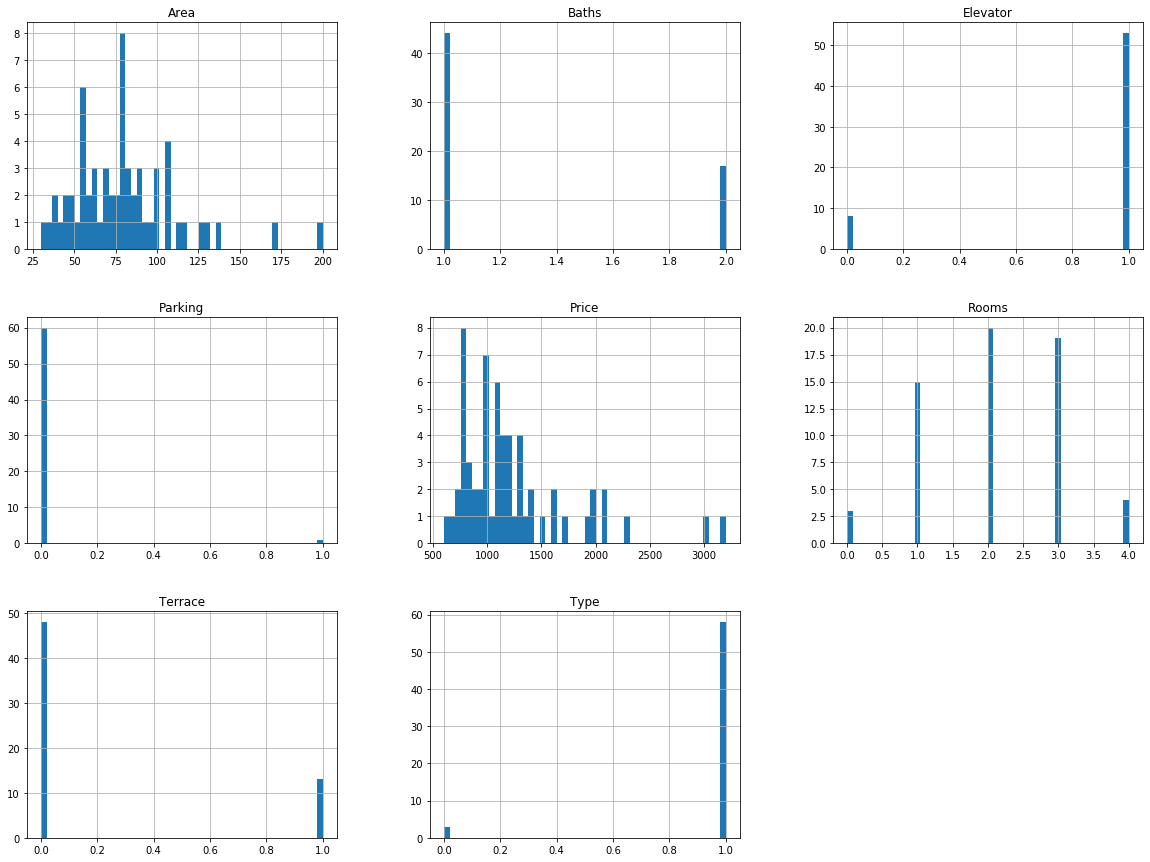

In [90]:
df_pisos.hist(bins=50, figsize=(20,15))
plt.show()

## Caso 1: Piso de 1 habitación, interior en El Viso

Para esto voy a evaluar los pisos de 1 habitación y estudios, no solo en El Viso, sino en todo el barrio de Chamartín y sus alrededores (Salamanca, Retiro y Chamartín), ¿por qué? porque todos estos barrios están muy bien comunicados con el Viso, son muy similares en calidad y si mi piso lo alquilo a 700€, pero la media por pisos de 1 habitación en el barrio de Salamanca (un barrio que se considera más caro), pues ya voy mal

In [ ]:
Vamos a analizar un poco nuestra base de datos, te

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 474 entries, 0 to 473
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Descripción  474 non-null    object
 1   Price        474 non-null    int64 
 2   Rooms        474 non-null    int64 
 3   Baths        474 non-null    int64 
 4   Area         474 non-null    int64 
 5   Elevator     474 non-null    int64 
 6   Parking      474 non-null    int64 
 7   Type         474 non-null    int64 
 8   NB           474 non-null    object
dtypes: int64(7), object(2)
memory usage: 33.5+ KB


In [91]:
A = [1,2,3,4,5,1,1,1,1,1]

In [94]:
lista =  []

for a in A:
    if a == 1:
        lista.append(a)

In [95]:
lista

[1, 1, 1, 1, 1, 1]